<a href="https://colab.research.google.com/github/Zauralochka/ML-ZoomCamp/blob/main/Linear_regression_HW2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## House prices

### Load data

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [3]:
!wget $data

--2022-09-18 07:53:14--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2022-09-18 07:53:14 (19.9 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [4]:
df = pd.read_csv('housing.csv')

### EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


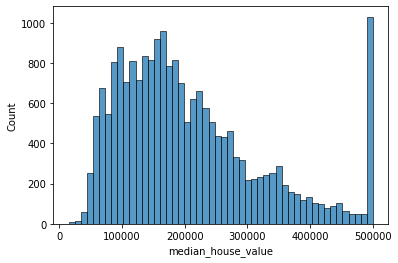

In [7]:
sns.histplot(df['median_house_value'], bins=50)

In [8]:
median_prices_log = np.log1p(df['median_house_value'])

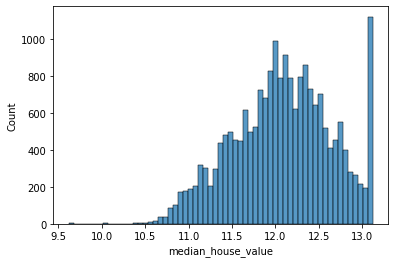

In [9]:
sns.histplot(median_prices_log)

Q1 Missing values
Find a feature with missing values. How many missing values does it have?

In [10]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

There are 207 missing values in column total_bedroom

In [11]:
del df['ocean_proximity']

Q2 Median for the population.  What's the median (50% percentile) for variable 'population'?

In [12]:
df['population'].median()

1166.0

### Split dataset
Let's split data set to 60%, 20%, 20%

In [13]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_train, n_val, n_test, n_train+n_val+n_test)

20640 12384 4128 4128 20640


In [14]:
idx = np.arange(n)

In [51]:
np.randomseed = 42
np.random.shuffle(idx)

In [16]:
df_train = df.iloc[idx[: n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val : ]]

In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = np.log1p(df_train['median_house_value'])
y_val = np.log1p(df_val['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

In [19]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [20]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.08,35.42,10.0,4159.0,608.0,2089.0,591.0,5.5261
1,-116.91,32.86,10.0,3699.0,838.0,2310.0,759.0,2.5365
2,-118.28,34.11,52.0,2036.0,348.0,775.0,332.0,5.4122
3,-117.27,32.84,26.0,3940.0,657.0,1180.0,600.0,6.1025
4,-122.09,37.37,27.0,1269.0,186.0,464.0,182.0,6.8374


In [21]:
print(len(df_train) + len(df_val) + len(df_test))

20640


Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [22]:
df_train_fill0 = df_train.fillna(0)

In [23]:
mean_val = df_train['total_bedrooms'].mean()
df_train_fill_mean = df_train.fillna(mean_val)

In [25]:
median_val = df_train['total_bedrooms'].median()
df_train_fill_median = df_train.fillna(median_val)

Linear regression function

In [26]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

Train the model when missing values filled with 0

In [27]:
w0_fill0, w_fill0 = train_linear_regression(df_train_fill0, y_train)

In [28]:
print(w0_fill0, w_fill0)

-11.830035080490537 [-2.77682095e-01 -2.82840085e-01  3.22322290e-03 -1.38491614e-05
  2.50265242e-04 -1.92083987e-04  4.44058033e-04  1.70169528e-01]


Train the model when missing values filled with mean value

In [29]:
w0_fillmean, w_fillmean = train_linear_regression(df_train_fill_mean, y_train)

In [30]:
print(w0_fillmean, w_fillmean)

-11.92874529559053 [-2.78536952e-01 -2.83187145e-01  3.24104936e-03 -1.95096441e-05
  3.51184105e-04 -1.88105738e-04  3.55264057e-04  1.71838987e-01]


Train the model when missing values filled with median value

In [31]:
w0_fillmedian, w_fillmedian = train_linear_regression(df_train_fill_median, y_train)

In [32]:
print(w0_fillmedian, w_fillmedian)

-11.920547347312375 [-2.78466437e-01 -2.83161876e-01  3.24224426e-03 -1.92225756e-05
  3.45262817e-04 -1.88307533e-04  3.60677781e-04  1.71743445e-01]


## RMSE function

In [33]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

Function to prepare data set

In [35]:
def prepare_X(df, fill_val):
    #df_num = df[base]
    df_num = df.fillna(fill_val)
    X = df_num.values
    return X

In [42]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
print(score, round(score, 2))

0.3427064829644094 0.34


In [ ]:
round(rmse)

In [43]:
X_train = prepare_X(df_train, mean_val)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, mean_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
print(score, round(score, 2))

0.3422307519196714 0.34


In [44]:
X_train = prepare_X(df_train, median_val)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, median_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
print(score, round(score, 2))

0.34229337989244096 0.34


Question 4
Now let's train a regularized linear regression.</br>
For this question, fill the NAs with 0.
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
Use RMSE to evaluate the model on the validation dataset.
Round the RMSE scores to 2 decimal digits.
Which r gives the best RMSE?
If there are multiple options, select the smallest r.

Options:

0
0.000001
0.001
0.0001

In [46]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [47]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [50]:
for r in r_list:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w0, score)
    print(r, round(score, 2))

0 -11.830035080490537 0.3427064829644094
0 0.34
1e-06 -11.830019135261407 0.34270648156004396
1e-06 0.34
0.0001 -11.828440773691147 0.3427063427467977
0.0001 0.34
0.001 -11.814111324947325 0.3427051027120666
0.001 0.34
0.01 -11.67270303353976 0.3426948179225032
0.01 0.34
0.1 -10.424863658897467 0.34275775565331384
0.1 0.34
1 -5.037674426656032 0.3461810145034102
1 0.35
5 -1.5263254418260228 0.3511094433817327
5 0.35
10 -0.8145083945904894 0.35236050655380097
10 0.35


If we round RMSE up to 2 decimal digits the score almost the same. The best reult had showen with the r=0.01

Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
For each seed, do the train/validation/test split with 60%/20%/20% distribution.
Fill the missing values with 0 and train a model without regularization.
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
Round the result to 3 decimal digits (round(std, 3))
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

Options:

0.16
0.00005
0.005
0.15555

In [83]:
df = pd.read_csv('housing.csv')
del df['ocean_proximity']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [84]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_train, n_val, n_test, n_train+n_val+n_test)

20640 12384 4128 4128 20640


In [85]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [86]:
idx = np.arange(n)

In [90]:
np.randomseed = 0
np.random.shuffle(idx)

df_train = df.iloc[idx[: n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val : ]]
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
    
y_train = np.log1p(df_train['median_house_value'])
y_val = np.log1p(df_val['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']
    
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
score

0.3405874120081661

In [91]:
scores = []
for s in seed_values:
    np.randomseed = s
    np.random.shuffle(idx)

    df_train = df.iloc[idx[: n_train]]
    df_val = df.iloc[idx[n_train : n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val : ]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = np.log1p(df_train['median_house_value'])
    y_val = np.log1p(df_val['median_house_value'])
    y_test = np.log1p(df_test['median_house_value'])

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    scores.append(score)
print(scores) 


[0.34175294508841947, 0.3329946930135838, 0.3408213614914723, 0.3531012956664299, 0.35007390020773066, 0.33333514908614514, 0.352867125621018, 0.3364119763855354, 0.34598593246457693, 0.3403279636574511]


In [92]:
std_scores = np.std(scores)
std_scores

0.007128599836420536

In [95]:
result = round(std_scores, 3)
result

0.007

Question 6
Split the dataset like previously, use seed 9.
Combine train and validation datasets.
Fill the missing values with 0 and train a model with r=0.001.
What's the RMSE on the test dataset?
Options:

0.35
0.135
0.450
0.245

In [70]:
df = pd.read_csv('housing.csv')
del df['ocean_proximity']
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


Split data set

In [71]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
print(n, n_train, n_val, n_test, n_train+n_val+n_test)

20640 12384 4128 4128 20640


In [72]:
idx = np.arange(n)

np.randomseed = 9
np.random.shuffle(idx)

In [73]:
df_train = df.iloc[idx[: n_train]]
df_val = df.iloc[idx[n_train : n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val : ]]

In [74]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [75]:
y_train = np.log1p(df_train['median_house_value'])
y_val = np.log1p(df_val['median_house_value'])
y_test = np.log1p(df_test['median_house_value'])

In [76]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

Combine train and validation sets

In [77]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
df_full_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.77,36.78,40.0,1411.0,284.0,609.0,296.0,1.9375
1,-118.12,34.69,17.0,2479.0,390.0,1219.0,363.0,4.6417
2,-121.57,39.80,23.0,790.0,137.0,365.0,152.0,2.1912
3,-118.12,34.07,43.0,1050.0,252.0,820.0,244.0,2.0250
4,-117.98,33.86,26.0,1240.0,285.0,781.0,315.0,4.1287
...,...,...,...,...,...,...,...,...
16507,-116.26,33.65,3.0,7437.0,1222.0,574.0,302.0,10.2948
16508,-120.46,34.64,16.0,686.0,217.0,614.0,200.0,0.8106
16509,-117.54,34.47,4.0,6712.0,1200.0,3126.0,1026.0,3.2277
16510,-117.88,33.87,35.0,1919.0,349.0,1302.0,345.0,5.6409


In [78]:
y_full_train = np.concatenate([y_train, y_val])

Prepare data set and train the model with regularization

In [ ]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [80]:
X_full_train = prepare_X(df_full_train, 0)
X_full_train

array([[-1.1977e+02,  3.6780e+01,  4.0000e+01, ...,  6.0900e+02,
         2.9600e+02,  1.9375e+00],
       [-1.1812e+02,  3.4690e+01,  1.7000e+01, ...,  1.2190e+03,
         3.6300e+02,  4.6417e+00],
       [-1.2157e+02,  3.9800e+01,  2.3000e+01, ...,  3.6500e+02,
         1.5200e+02,  2.1912e+00],
       ...,
       [-1.1754e+02,  3.4470e+01,  4.0000e+00, ...,  3.1260e+03,
         1.0260e+03,  3.2277e+00],
       [-1.1788e+02,  3.3870e+01,  3.5000e+01, ...,  1.3020e+03,
         3.4500e+02,  5.6409e+00],
       [-1.1836e+02,  3.3900e+01,  4.2000e+01, ...,  1.1360e+03,
         3.7900e+02,  4.7400e+00]])

In [81]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [82]:
X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)

rmse(y_test , y_pred)

0.3457887990801318